# Unsupervised learning with t-distributed Stochastic Network Embedding (t-SNE)
### Dataset 2: [Wine.txt](input/Wine.txt)

### Description of the technique
t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

### Objective
Find and plot the t-SNE projection in two dimensions, using a different color for each class.

## Index
<nav>

* [Import modules](#1)
* [Loading dataset](#2)
* [Standardize the data](#3)
* [t-SNE Projection to 2D](#4)
* [Visualize 2D Projection](#5)
* [References](#6)
</nav>

<a id="1"></a>
## Import modules

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

<a id="2"></a>
## Loading dataset

In [3]:
# Load training data
filename = 'input/Wine.txt'
df = pd.read_csv(filename, delimiter=',', header=0)
print(df)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

<a id="3"></a>
## Standardize the data

In [4]:
features = ['Alcohol','Malic_Acid','Ash','Ash_Alcanity','Magnesium','Total_Phenols','Flavanoids','Nonflavanoid_Phenols','Proanthocyanins','Color_Intensity','Hue','OD280','Proline']
target = ['Customer_Segment']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target (class)
y = df.loc[:, target].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

<a id="4"></a>
## t-SNE Projection to 2D

The original data has 4 columns (x, y, z, t). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. After dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [5]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1)
tsne_result = tsne.fit_transform(x)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

print("original shape:   ", x.shape)
print("transformed shape:", tsne_result.shape)

/home/sergi/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sergi/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.625735
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.801044
[t-SNE] KL divergence after 800 iterations: 0.374613
t-SNE done! Time elapsed: 12.67219066619873 seconds
original shape:    (178, 13)
transformed shape: (178, 2)


<a id="5"></a>
## Visualize 2D Projection

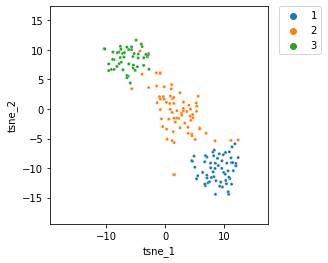

In [7]:
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'class': y[:,0]})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='class', data=tsne_result_df, ax=ax,s=10, palette=sns.color_palette(n_colors=3S))
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

<a id="6"></a>
## References

t-distributed Neighbor Stochastic Embedding:

- [t-SNE Python Example](https://towardsdatascience.com/t-sne-python-example-1ded9953f26)
- [tSNE con Python, una introducción](https://sitiobigdata.com/2019/10/27/una-introduccion-a-tsne-con-python)
- [Comprehensive Guide on t-SNE algorithm with implementation in R & Python](https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/)
- [Visualizing Data using t-SNE](https://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)
- [Introduction to t-SNE in Python with scikit-learn](https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/)
- [t-SNE and UMAP projections in Python](https://plotly.com/python/t-sne-and-umap-projections/)
- [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)